Missing values before processing:
 Car_Age    0
Price      0
dtype: int64

Mean Squared Error: 29076373.670967907
R^2 Score: 0.997362687195377


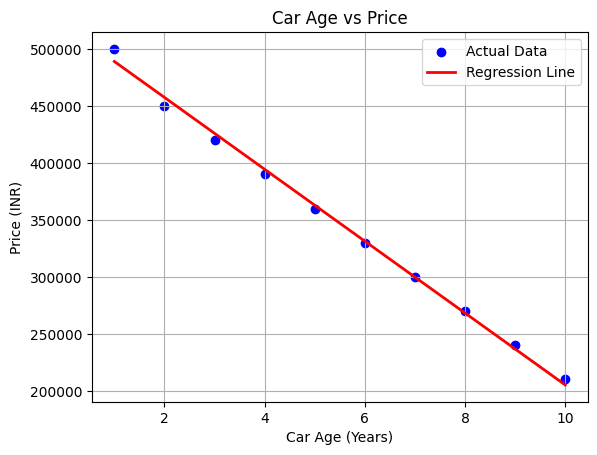

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Create a small dataset
data = {
    'Car_Age': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Price': [500000, 450000, 420000, 390000, 360000, 330000, 300000, 270000, 240000, 210000]
}

# Step 2: Load the data into a pandas DataFrame
df = pd.DataFrame(data)

# Step 3: Check for missing values
print("Missing values before processing:\n", df.isnull().sum())

# Step 4: Features and Target
X = df[['Car_Age']]  # Feature
y = df['Price']      # Target

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 9: Visualization
plt.scatter(X, y, color='blue',label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Car Age vs Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.8 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.8 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.8 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.8 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.8 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.8 MB 1.5 MB/s eta 0:00:05
   -------------- ------

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce  # Install using: pip install category_encoders

In [43]:
# Sample dataset
data = {
    'Brand': ['Toyota', 'Honda', 'Ford', 'Honda', 'Ford', 'Toyota', 'Ford'],
    'Fuel_Type': ['Petrol', 'Diesel', 'Diesel', 'Petrol', 'Petrol', 'Diesel', 'Petrol'],
    'Transmission': ['Manual', 'Automatic', 'Manual', 'Manual', 'Automatic', 'Automatic', 'Manual'],
    'Condition': ['Excellent', 'Good', 'Fair', 'Good', 'Fair', 'Excellent', 'Fair'],
    'Price': [500000, 400000, 300000, 380000, 310000, 520000, 290000]
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

Original Dataset:
     Brand Fuel_Type Transmission  Condition   Price
0  Toyota    Petrol       Manual  Excellent  500000
1   Honda    Diesel    Automatic       Good  400000
2    Ford    Diesel       Manual       Fair  300000
3   Honda    Petrol       Manual       Good  380000
4    Ford    Petrol    Automatic       Fair  310000
5  Toyota    Diesel    Automatic  Excellent  520000
6    Ford    Petrol       Manual       Fair  290000


In [44]:
# ---------- Label Encoding ----------
label_encoder = LabelEncoder()
df['Brand_Label'] = label_encoder.fit_transform(df['Brand'])
print(df['Brand_Label'])

0    2
1    1
2    0
3    1
4    0
5    2
6    0
Name: Brand_Label, dtype: int64


In [46]:
# ---------- One-Hot Encoding ----------
df_onehot = pd.get_dummies(df[['Fuel_Type']], prefix='Fuel')
print(df_onehot)

   Fuel_Diesel  Fuel_Petrol
0        False         True
1         True        False
2         True        False
3        False         True
4        False         True
5         True        False
6        False         True


In [48]:
# ---------- Binary Encoding ----------
binary_encoder = ce.BinaryEncoder(cols=['Transmission'])
df_binary = binary_encoder.fit_transform(df[['Transmission']])
print(df['Transmission'])
print(binary_encoder)
print("df_binary:\n",df_binary)

0       Manual
1    Automatic
2       Manual
3       Manual
4    Automatic
5    Automatic
6       Manual
Name: Transmission, dtype: object
BinaryEncoder(cols=['Transmission'],
              mapping=[{'col': 'Transmission',
                        'mapping':     Transmission_0  Transmission_1
 1               0               1
 2               1               0
-1               0               0
-2               0               0}])
df_binary:
    Transmission_0  Transmission_1
0               0               1
1               1               0
2               0               1
3               0               1
4               1               0
5               1               0
6               0               1


In [50]:
# ---------- Target / Mean Encoding ----------
mean_encoder = ce.TargetEncoder(cols=['Brand'])
df_target = mean_encoder.fit_transform(df[['Brand']], df['Price'])
print(df_target)

           Brand
0  403344.346638
1  386322.218850
2  372474.405850
3  386322.218850
4  372474.405850
5  403344.346638
6  372474.405850


In [37]:
# ---------- Ordinal Encoding ----------
condition_order = ['Fair', 'Good', 'Excellent']
ordinal_encoder = OrdinalEncoder(categories=[condition_order])
df['Condition_Ordinal'] = ordinal_encoder.fit_transform(df[['Condition']])
print(df['Condition_Ordinal'])

0    2.0
1    1.0
2    0.0
3    1.0
4    0.0
5    2.0
6    0.0
Name: Condition_Ordinal, dtype: float64


In [19]:
# Combine all encodings into one view
df_encoded = pd.concat([df, df_onehot, df_binary, df_target.add_suffix('_TargetEncoded')], axis=1)

print("\nEncoded Dataset:\n", df_encoded)


Encoded Dataset:
     Brand Fuel_Type Transmission  Condition   Price  Brand_Label  \
0  Toyota    Petrol       Manual  Excellent  500000            2   
1   Honda    Diesel    Automatic       Good  400000            1   
2    Ford    Diesel       Manual       Fair  300000            0   
3   Honda    Petrol       Manual       Good  380000            1   
4    Ford    Petrol    Automatic       Fair  310000            0   
5  Toyota    Diesel    Automatic  Excellent  520000            2   
6    Ford    Petrol       Manual       Fair  290000            0   

   Condition_Ordinal  Fuel_Diesel  Fuel_Petrol  Transmission_0  \
0                2.0        False         True               0   
1                1.0         True        False               1   
2                0.0         True        False               0   
3                1.0        False         True               0   
4                0.0        False         True               1   
5                2.0         True       